In [1]:
import os, sys, cv2
import numpy as np

import matplotlib.pyplot as plt

In [11]:
## 히스토그램 역투사(역투영)

src = cv2.imread('../ch_4/green/green.png', cv2.IMREAD_REDUCED_COLOR_2)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# region of interest
x, y, w, h = cv2.selectROI(src)
  # 관심되는 영역 선택
    
# print(x, y, w, h)
    
crop = src_ycrcb[y:y+h, x:x+w]               # 범위 지정 후 엔터를 누르면 그 부분이 빠져나옴.

channels = [1, 2]
histsize = [256, 256]
ranges = [0, 256, 0, 256]
    
hist = cv2.calcHist([crop], channels, None, histsize, ranges)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)       # 지정된 범위와 같은 색을 마스크로 만들어 저장

dst = cv2.copyTo(src, backproj)                                           # 만들어진 마스크(여기서는 backproj)를 copyTo

cv2.imshow('src', src)
# cv2.imshow('crop', crop)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
print(hist.shape)
print(type(hist))

(256, 256)
<class 'numpy.ndarray'>


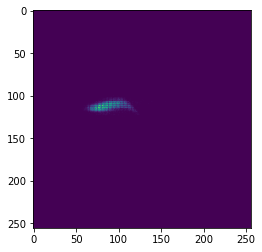

In [7]:
plt.imshow(hist)
plt.show()               # 두 개(crcy) 조인

In [30]:
src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png')

src = cv2.resize(src, (300, 200), interpolation = cv2.INTER_AREA)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_1 = cv2.imread('../ch_4/green/green.png', cv2.IMREAD_REDUCED_COLOR_2)
src_1_1 = src_1[0:200, 200:500]



x, y, w, h = cv2.selectROI(src)
print(x, y, w, h)

crop_src = src_ycrcb[y:y+h, x:x+w]

# cv2.namedWindow('crop_src', cv2.WINDOW_NORMAL)

ch = [1, 2]
histsize = [256, 256]
ranges = [0, 256, 0, 256]

hist = cv2.calcHist([crop_src], ch, None, histsize, ranges)

backproj = cv2.calcBackProject([src_ycrcb], ch, hist, ranges, 1)

dst = cv2.copyTo(src, backproj, src_1_1)

cv2.imshow('src', src)
# cv2.imshow('crop_src', crop_src)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)
cv2.imshow('src_1', src_1)

cv2.waitKey()
cv2.destroyAllWindows()

95 79 70 32


In [8]:
print(src.shape)
print(src_1.shape)

(553, 840, 3)
(562, 750, 3)


In [33]:
## 평균 필터

src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png')

kernel_3 = np.ones((3, 3), np.float32)/9.                         # 필터는 float으로
kernel_5 = np.ones((5, 5), np.float32)/25.

dst_3 = cv2.filter2D(src, -1, kernel_3, -1)
                         # 출력 영상의 타입: -1은 똑같이
dst_5 = cv2.filter2D(src, -1, kernel_5, -1)

dst_3_blur = cv2.blur(src, (3, 3))
dst_5_blur = cv2.blur(src, (5, 5))

cv2.imshow('src', src)
cv2.imshow('dst_3', dst_3)
cv2.imshow('dst_5', dst_5)
cv2.imshow('dst_3_blur', dst_3_blur)
cv2.imshow('dst_5_blur', dst_5_blur)

cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
## 필터 함수

src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png')

kernel_3 = np.ones((3, 3), np.float32)/9.                         # 필터는 float으로
kernel_5 = np.ones((5, 5), np.float32)/25.

dst_3 = cv2.filter2D(src, -1, kernel_3, -1)
                         # 출력 영상의 타입: -1은 똑같이
dst_5 = cv2.filter2D(src, -1, kernel_5, -1)

dst_3_blur = cv2.blur(src, (3, 3))
dst_5_blur = cv2.blur(src, (5, 5))

cv2.imshow('src', src)

for ksize in (3, 5, 7,9):
    dst = cv2.blur(src, (ksize, ksize))
    
    text = '{} x {}'.format(ksize, ksize)
    cv2.putText(dst, text, (30, 30), cv2.FONT_HERSHEY_COMPLEX, 
               1, (0, 0, 255), 2, cv2.LINE_AA)
    
    cv2.imshow('dst', dst)
    cv2.waitKey()
    
    
cv2.destroyAllWindows()

In [36]:
## 가우시안 필터 -> 공간에 대한 필터만 사용

src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png')

# 가우시안                                          # 평균 필터보다 보기 좋으면서 원본의 노이즈를 제거 
dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 1.)   # float으로 넣음

dst_blur = cv2.blur(src, (7, 7))

cv2.imshow('src', src)
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_Gaussian', dst_Gaussian)


cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
## 메디안 필터(잘 사용하지 않음) -> 점같은 노이즈 제거(컬로도 가능)

src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png', 1)

# 일부로 노이즈를 추가
salt_pepper_noise1 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01))   # 0.01의 확률로 255가 나온다.
salt_pepper_noise2 = np.random.choice((0, 255), src.shape, p = (0.99, 0.01))

src_noise = src + salt_pepper_noise1 - salt_pepper_noise2
src_noise = np.clip(src_noise, 0, 255).astype(np.uint8)

# 메디안 필터
dst = cv2.medianBlur(src_noise, 3)

cv2.imshow('src', src)
cv2.imshow('srsrc_noise', src_noise)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [46]:
## bilateralFilter -> 공간에 대한 필터와 색에 대한 필터까지 사용하여 원본을 최대한 유지(하지만 속도가 느림)

src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png', 0)

dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 5.0)                 # 5.0으로 조금 과도하게 필터 사용

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)             # d = -1,

cv2.imshow('src', src)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)

cv2.waitKey()
cv2.destroyAllWindows()

In [52]:
src_1 = cv2.imread('../Ch_5_filtering/images.jpg')
src_2 = cv2.imread('../Ch_5_filtering/images.jpg', 0)

dst_Gaussian_1 = cv2.GaussianBlur(src_1, (0, 0), 5.0)
dst_Gaussian_2 = cv2.GaussianBlur(src_2, (0, 0), 5.0)

dst_bilateral_1 = cv2.bilateralFilter(src_1, -1, 10, 5.0)
dst_bilateral_2 = cv2.bilateralFilter(src_2, -1, 10, 5.0)

cv2.imshow('src_1', src_1)
cv2.imshow('src_2', src_2)
cv2.imshow('dst_Gaussian_1', dst_Gaussian_1)
cv2.imshow('dst_Gaussian_2', dst_Gaussian_2)
cv2.imshow('dst_bilateral_1', dst_bilateral_1)
cv2.imshow('dst_bilateral_2', dst_bilateral_2)

cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
## 미분 필터

src = cv2.imread('../Ch_5_filtering/fig/son.jpg', 0)
                        # cv2.CV_32F = float 타입으로 변경, magnitude를 사용하지 않는다면 그냥 -1을 넣어주면 됨.
dx = cv2.Sobel(src, cv2.CV_32F, 1, 0, delta = 128)               # x 방향으로 미분 필터 (세로 한 줄 비어있음)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1, delta = 128)               # y 방향으로 미분 필터 (가로 한 줄 비어있음)

mag = np.clip(cv2.magnitude(dx, dy), 0, 255).astype(np.uint8)
               # magnitude : float 타입만 받으면서 dx, dy 미분을 합쳐주는 함수
_, thres = cv2.threshold(mag, 230, 255, cv2.THRESH_BINARY)          # 230 이상이면 무조건 엣지

cv2.imshow('src', src)
cv2.imshow('dx', dx)
cv2.imshow('dy', dy)
cv2.imshow('mag', mag)
cv2.imshow('thres', thres)

cv2.waitKey()
cv2.destroyAllWindows()

In [64]:
## Canny 엣지 필터(magnitude보다 주로 사용)

src = cv2.imread('../Ch_5_filtering/fig/son.jpg')

src_Gaussian = cv2.GaussianBlur(src, (0, 0), 2)

edge = cv2.Canny(src, 100, 200)                              # edge는 미분필터를 사용하여 구하는 것.
                      # 하한선, 상한선 -> 200 이상이면 무조건 엣지, 100 이하는 무시, 100과200 사이는 200 이상과 연결되어 있음 엣지.
edge_1 = 255 - edge    

edge_2 = cv2.cvtColor(edge_1, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(src_Gaussian, edge_2)

cv2.imshow('src', src)
cv2.imshow('src_Gaussian', src_Gaussian)
cv2.imshow('edge', edge)
cv2.imshow('edge_1', edge_1)
cv2.imshow('edge_2', edge_2)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [71]:
src_ea = cv2.imread('../Ch_5_filtering/earth-7043847_960_720.jpg')

src_Gaussian_ea = cv2.GaussianBlur(src_ea, (0, 0), 2)

edge_ea = cv2.Canny(src_ea, 100, 200)

edge_ea_1 = 255 - edge_ea

edge_ea_2 = cv2.cvtColor(edge_ea_1, cv2.COLOR_GRAY2BGR)

dst_ea = cv2.bitwise_and(src_Gaussian_ea, edge_ea_2)

cv2.imshow('src_ea', src_ea)
cv2.imshow('dst_ea', dst_ea)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
## 연산 과정에 걸리는 시간 (time = cv2.TickMeter())

src = cv2.imread('../Ch_5_filtering/fig/son.jpg')

time = cv2.TickMeter()                                        # cv2 에서 time 파라미터 가져오기
time.start()                                         # 시간 측정 시작

src_Gaussian = cv2.GaussianBlur(src, (0, 0), 2)

edge = cv2.Canny(src, 100, 200)                          
                      
edge_1 = 255 - edge    

edge_2 = cv2.cvtColor(edge_1, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(src_Gaussian, edge_2)

time.stop()                                        # 시간 측정 종료
print(time.getTimeMilli(), 'ms')                   # 시간 측정 출력

time.reset()                                       # 시간 측정 리셋

cv2.imshow('src', src)
cv2.imshow('src_Gaussian', src_Gaussian)
cv2.imshow('edge', edge)
cv2.imshow('edge_1', edge_1)
cv2.imshow('edge_2', edge_2)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [75]:
## geometric_trans


## 이동
src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

M = np.array([[1, 0, 100],
            [0, 1, 100]], dtype = np.float32)

                            # (0, 0)은 원본 사이즈 유지, M은 동차 좌표계 매트릭스
dst = cv2.warpAffine(src, M, (0, 0))


#  cv2.warpPerspective은 warpAffine보다 더 발전된것

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [76]:
src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

M = np.array([[2, 0, 0],
            [0, 2, 0]], dtype = np.float32)

print(src.shape)

                            # (0, 0)은 원본 사이즈 유지, M은 동차 좌표계 매트릭스
dst = cv2.warpAffine(src, M, (1280, 940))           # 확대할때는 비율만큼 곱하기


#  cv2.warpPerspective은 warpAffine보다 더 발전된것

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(480, 640, 3)


In [80]:
src = cv2.imread('../Ch_6_geometric_trans/fig/rose.jpg')    # 산드라 있어요?

# resize는 interpolation 을 사용할 수 있음
dst1 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_NEAREST)       # 가까운 것으로 사용
dst2 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_LINEAR)        # 선형 보간
dst3 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_CUBIC)         # 고차항 사용(삼차항 이상)
dst4 = cv2.resize(src, (1920, 1280), interpolation = cv2.INTER_LANCZOS4)      # CUBIC보다 나음


cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [82]:
## 회전

src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

rad = 20*np.pi/180
M = np.array([[np.cos(rad), np.sin(rad), 0],
             [-np.sin(rad), np.cos(rad), 0]], dtype = np.float32)

dst = cv2.warpAffine(src, M, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

ValueError: setting an array element with a sequence.

In [90]:
src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

# rad = 20*np.pi/180
# M = np.array([[np.cos(rad), np.sin(rad), 0],
#              [-np.sin(rad), np.cos(rad), 0]], dtype = np.float32)

# 중심 설정하기
h, w = src.shape[:2]
cp = (w/2, h/2)

M  = cv2.getRotationMatrix2D(cp, 20, 1)            # 중간 숫자 양수일 경우 반시계방향, 마지막 숫자 -1일 경우 상하반전

dst = cv2.warpAffine(src, M, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [87]:
src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

M = np.array([[1, 0, 0],
            [0.2, 1, 0]], dtype = np.float32)

print(src.shape)

                            # (0, 0)은 원본 사이즈 유지, M은 동차 좌표계 매트릭스
dst = cv2.warpAffine(src, M, (0, 0))           # 확대할때는 비율만큼 곱하기
                                               #  cv2.warpPerspective은 warpAffine보다 더 발전된것

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(480, 640, 3)


In [4]:
## 이미지 돌리기

src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

print(src.shape)

M = np.array([[1, 0.2, 0],
            [0.2, 1, 0]], dtype = np.float32)

                           
dst = cv2.warpAffine(src, M, (738, 610))

img = [dst]

for i in range(1, 360):
    h, w = dst.shape[:2]
    cp = (w/2, h/2)
        
    M_1 = cv2.getRotationMatrix2D(cp, i, 1)
    dst_1 = cv2.warpAffine(dst, M_1, (0, 0))
    
    img.append(dst_1)

    
idx = 0
while True:
    
    play = img[idx]
    
    cv2.imshow('scene', play)
    
    if cv2.waitKey(3) == 27:
        break
    
    idx += 1
    
    if idx >= len(img):
        idx = 0

        
# cv2.imshow('src', src)
# cv2.imshow('dst', dst)
# cv2.imshow('dst_1', dst_1)

# cv2.waitKey()
cv2.destroyAllWindows()

(480, 640, 3)


In [110]:
## 이미지 안의 자료 펼쳐서 채우기

src = cv2.imread('../Ch_6_geometric_trans/fig/checkerboard.png')

h, w = src.shape[:2]

# print(w, h) -> 960, 540

src_point = np.array([[217, 50], [691, 47], [830, 517], [67, 526]], dtype = np.float32)
dst_point = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], dtype = np.float32)

pers = cv2.getPerspectiveTransform(src_point, dst_point)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [111]:
## Remapping

src = cv2.imread('../Ch_6_geometric_trans/fig/bamboo.jpg')
#
if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)
print(map2)
print(map2.shape)
map1 = map1 + 10 * np.sin(map2/32)

print(np.sin(map2/32))
dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [597. 597. 597. ... 597. 597. 597.]
 [598. 598. 598. ... 598. 598. 598.]
 [599. 599. 599. ... 599. 599. 599.]]
(600, 498)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.03124491  0.03124491  0.03124491 ...  0.03124491  0.03124491
   0.03124491]
 [ 0.06245932  0.06245932  0.06245932 ...  0.06245932  0.06245932
   0.06245932]
 ...
 [-0.19210428 -0.19210428 -0.19210428 ... -0.19210428 -0.19210428
  -0.19210428]
 [-0.16134752 -0.16134752 -0.16134752 ... -0.16134752 -0.16134752
  -0.16134752]
 [-0.13043322 -0.13043322 -0.13043322 ... -0.13043322 -0.13043322
  -0.13043322]]
